<a href="https://colab.research.google.com/github/yosrahamdi/ImageClassification/blob/master/projet_IA_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install kaggle

In [0]:
!mkdir /content/.kaggle

In [0]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!ls /content/gdrive

'My Drive'


In [0]:
import json
token = {"username":"yosrahamdi","key":"b57f5b85266d5e16c0c3d82e38196753"}
with open('/content/kaggle/kaggle.json', 'w+') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/kaggle/kaggle.json

In [13]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [14]:
!kaggle datasets download -d clorichel/boat-types-recognition

100% 841M/842M [00:18<00:00, 40.1MB/s]
100% 842M/842M [00:18<00:00, 47.2MB/s]


In [15]:
# unzip dataset
!unzip /content/datasets/clorichel/boat-types-recognition/boat-types-recognition.zip

Archive:  /content/datasets/clorichel/boat-types-recognition/boat-types-recognition.zip
  inflating: boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: boats/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: boats/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: boats/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: boats/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: boats/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: boats/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: boats/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: boats/buoy/buoy-beach-sea-buoys-scenic-242727.jpg  
  inflating: boats/buoy/buoy-beacon-sea-beach-sand-2266571.jpg  
  inflating: boats/buoy/buoy-beacon-water-blue-yellow-1661196.jpg  
  inflating: boats/buoy/buoy-buoy-marker-ocean-sea-sea-buoy-tide-72044.jpg  
  inflating: boats/buoy/buoy-float-floating-device-lifebuoy-2723.jpg  
  inflating: boats/buoy/buoy-l

In [16]:
import os
import tarfile
import cv2

import numpy as np
import pandas as pd
import pprint

import operator


from matplotlib.pyplot import imshow 
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Conv2D, Input, Activation, Dense, MaxPooling2D, Flatten

import sys


Using TensorFlow backend.


In [0]:
def return_images_per_category(data_directory):
    categories = os.listdir(data_directory+"/boats/")
    object_images_count_dict = {}
    for category in categories:
        object_images_count_dict[category] = len(os.listdir(data_directory+"/boats/"+category))
    object_images_count_dict = sorted(object_images_count_dict.items(), key=operator.itemgetter(1), reverse=True)
    return object_images_count_dict

In [18]:
return_images_per_category('/content')

[('sailboat', 488),
 ('kayak', 254),
 ('gondola', 242),
 ('cruise ship', 239),
 ('ferry boat', 81),
 ('buoy', 68),
 ('paper boat', 40),
 ('freight boat', 29),
 ('inflatable boat', 21)]

In [19]:
total_count = 0
for category,count in return_images_per_category('/content'):
    total_count += count
print("Total number of images in training data : ",total_count)

Total number of images in training data :  1462


In [0]:
def get_images(object_category, data_directory):
    if (not os.path.exists(data_directory)):
        print("Data directory not found.")
        return
    obj_category_dir = os.path.join(data_directory+"/boats/"+object_category)
    images = [os.path.join(obj_category_dir,img) for img in os.listdir(obj_category_dir)]
    return images

def read_image(image_path):
    """Read and resize individual images - Caltech 101 avg size of image is 300x200, so we resize accordingly"""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (300,200), interpolation=cv2.INTER_CUBIC)
    return img

In [0]:
def create_training_data(data_directory):
    i = 0
    X = np.ndarray((1462, 200, 300, 3), dtype=np.uint8)
    Y = []
    print("Preparation X and Y")
    for category,_ in return_images_per_category(data_directory):
        print("Processing images of ",category)
        for image in get_images(category, data_directory):
            if not image.endswith('.jpg'): 
                continue
            X[i] = read_image(image)
            Y.insert(i,category) 
            i += 1
        print("Images processed : ",i+1," of 1463")
    print("Datasets constructed")
    return X,Y

In [72]:
X, Y = create_training_data('/content')

Preparation X and Y
Processing images of  sailboat
Images processed :  489  of 1463
Processing images of  kayak
Images processed :  743  of 1463
Processing images of  gondola
Images processed :  985  of 1463
Processing images of  cruise ship
Images processed :  1224  of 1463
Processing images of  ferry boat
Images processed :  1305  of 1463
Processing images of  buoy
Images processed :  1373  of 1463
Processing images of  paper boat
Images processed :  1413  of 1463
Processing images of  freight boat
Images processed :  1442  of 1463
Processing images of  inflatable boat
Images processed :  1463  of 1463
Datasets constructed


In [73]:
X.shape

(1462, 200, 300, 3)

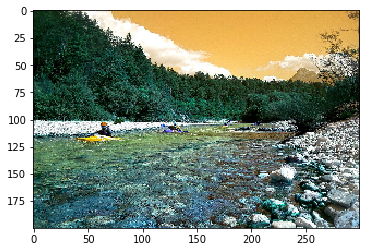

In [74]:
imshow(X[558])

In [75]:
Y[558]

'kayak'

In [76]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([8, 8, 8, ..., 5, 5, 5])

In [0]:
np.save('label_encoder.npy', label_encoder.classes_)

In [77]:
Y_integer_encoded.shape

(1462,)

In [178]:
len(Y_integer_encoded)

1462

In [79]:
Y_one_hot = to_categorical(Y_integer_encoded)
Y_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [179]:
len(Y_one_hot[0])

9

In [81]:
Y_one_hot.shape

(1462, 9)

In [189]:
label_encoder.inverse_transform([np.argmax(Y_one_hot[0]),])

array(['sailboat'], dtype='<U15')

In [0]:
X_normaliz = X.astype(np.float64) / 255

In [85]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [86]:
X[0].shape

(200, 300, 3)

In [87]:
X.shape

(1462, 200, 300, 3)

In [88]:
X_normaliz

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normaliz, Y_one_hot, test_size=0.25, random_state=42)

In [90]:
X_train.shape

(1096, 200, 300, 3)

In [91]:
Y_train.shape

(1096, 9)

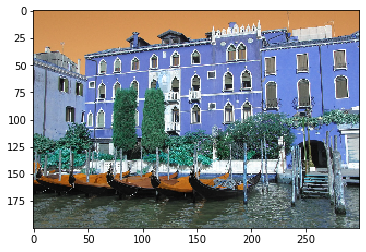

In [92]:
imshow(X_train[60])

In [200]:
label_encoder.inverse_transform([np.argmax(Y_train[60]), ])

array(['gondola'], dtype='<U15')

In [0]:
# build CNN 

In [96]:
model_cnn = Sequential()
model_cnn.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn.add(Conv2D(32, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(9, activation='softmax'))
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 196, 296, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 94, 144, 128)      73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 72, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 433152)           

In [0]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [98]:
history1 = model_cnn.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data=(X_test,Y_test))

Train on 1096 samples, validate on 366 samples
Epoch 1/30
1096/1096 [==============================] - 7s 7ms/step - loss: 2.0560 - acc: 0.2965 - val_loss: 1.7426 - val_acc: 0.3962
Epoch 2/30
1096/1096 [==============================] - 4s 3ms/step - loss: 1.5757 - acc: 0.4562 - val_loss: 1.6619 - val_acc: 0.3934
Epoch 3/30
1096/1096 [==============================] - 4s 3ms/step - loss: 1.4068 - acc: 0.4954 - val_loss: 1.5052 - val_acc: 0.5055
Epoch 4/30
1096/1096 [==============================] - 4s 3ms/step - loss: 1.1418 - acc: 0.6022 - val_loss: 1.5650 - val_acc: 0.5191
Epoch 5/30
1096/1096 [==============================] - 4s 3ms/step - loss: 0.9177 - acc: 0.6870 - val_loss: 1.8844 - val_acc: 0.5082
Epoch 6/30
1096/1096 [==============================] - 4s 3ms/step - loss: 0.5828 - acc: 0.7920 - val_loss: 1.9556 - val_acc: 0.5164
Epoch 7/30
1096/1096 [==============================] - 4s 3ms/step - loss: 0.3106 - acc: 0.9024 - val_loss: 2.2983 - val_acc: 0.4863
Epoch 8/30
1096

<function matplotlib.pyplot.show>

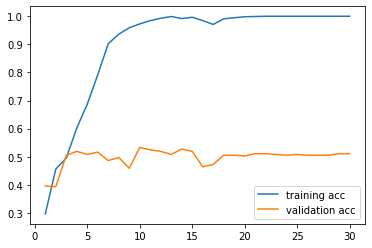

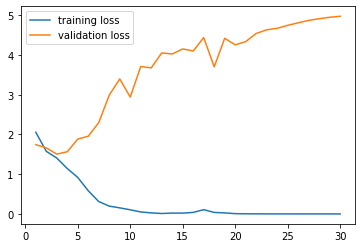

In [99]:
accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, label='training acc')
plt.plot(epochs, val_accuracy, label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.show

In [0]:
# accurcy 0.51

In [0]:
# CNN with epoch = 17 batch siye 5

In [107]:
history2 = model_cnn.fit(X_train, Y_train, batch_size= 10 , epochs=17, validation_data=(X_test,Y_test))

Train on 1096 samples, validate on 366 samples
Epoch 1/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0299 - acc: 0.9982 - val_loss: 6.8187 - val_acc: 0.4126
Epoch 2/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0298 - acc: 0.9982 - val_loss: 6.8569 - val_acc: 0.4153
Epoch 3/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0298 - acc: 0.9982 - val_loss: 6.8926 - val_acc: 0.4180
Epoch 4/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0297 - acc: 0.9982 - val_loss: 6.9276 - val_acc: 0.4153
Epoch 5/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0297 - acc: 0.9982 - val_loss: 6.9552 - val_acc: 0.4126
Epoch 6/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0296 - acc: 0.9982 - val_loss: 6.9880 - val_acc: 0.4180
Epoch 7/17
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0296 - acc: 0.9982 - val_loss: 7.0099 - val_acc: 0.4180
Epoch 8/17
1096

<function matplotlib.pyplot.show>

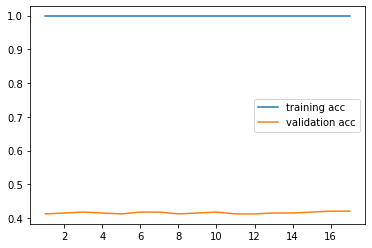

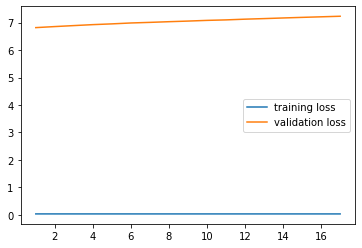

In [108]:
accuracy = history2.history['acc']
val_accuracy = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, label='training acc')
plt.plot(epochs, val_accuracy, label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.show

In [0]:
# malgres les changement des parametres les model ne s ameliore pas

In [0]:
# CNN Model with Dropout

In [110]:
# Architecture
from keras.layers import Dropout

model_cnn_dropout = Sequential()
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Flatten())
model_cnn_dropout.add(Dense(512, activation='relu'))
model_cnn_dropout.add(Dropout(0.5))
model_cnn_dropout.add(Dense(9, activation='softmax'))
model_cnn_dropout.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 94, 144, 64)       36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 47, 72, 64)        0         
____

In [111]:

model_cnn_dropout.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

his = model_cnn_dropout.fit(X_train, Y_train, batch_size= 10 , epochs=30 , validation_data=(X_test,Y_test))

Train on 1096 samples, validate on 366 samples
Epoch 1/30
1096/1096 [==============================] - 8s 7ms/step - loss: 1.8434 - acc: 0.3376 - val_loss: 1.8243 - val_acc: 0.3251
Epoch 2/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.7446 - acc: 0.3604 - val_loss: 1.7125 - val_acc: 0.3798
Epoch 3/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.6281 - acc: 0.4307 - val_loss: 1.6309 - val_acc: 0.4891
Epoch 4/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.5602 - acc: 0.4699 - val_loss: 1.6000 - val_acc: 0.4454
Epoch 5/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.4190 - acc: 0.5100 - val_loss: 1.4871 - val_acc: 0.5082
Epoch 6/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.3249 - acc: 0.5465 - val_loss: 1.5115 - val_acc: 0.5246
Epoch 7/30
1096/1096 [==============================] - 6s 5ms/step - loss: 1.2067 - acc: 0.5703 - val_loss: 1.4739 - val_acc: 0.4973
Epoch 8/30
1096

<function matplotlib.pyplot.show>

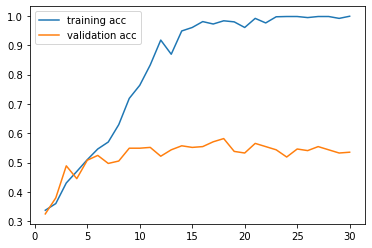

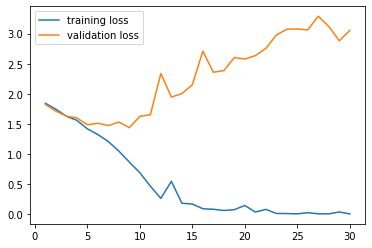

In [112]:
accuracy = his.history['acc']
val_accuracy = his.history['val_acc']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, label='training acc')
plt.plot(epochs, val_accuracy, label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.show

In [0]:
# accurcy 0.53

In [0]:
# build CNN with data augmentation

In [150]:
model_cnn = Sequential()
model_cnn.add(Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model_cnn.add(Conv2D(32, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(9, activation='softmax'))
model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 69, 69, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 34, 34, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 147968)          

In [0]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
# Data Generation

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/boats',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    '/content/boats',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


Found 1462 images belonging to 9 classes.
Found 1462 images belonging to 9 classes.


In [64]:
# take a look at batch generator 
for data_bach, label_batch in train_generator:
  print(data_bach.shape)
  print(label_batch.shape)
  break

print(label_batch)

(32, 150, 150, 3)
(32, 9)
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [48]:
train_generator

In [49]:
len(train_generator)

100

In [50]:
len(validation_generator)

100

In [152]:
history = model_cnn.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch = 1462,
                    validation_steps = 200,
                    epochs = 20)

Epoch 1/5
1462/1462 [==============================] - 963s 659ms/step - loss: 0.2232 - acc: 0.9274 - val_loss: 0.0103 - val_acc: 0.9994
Epoch 2/5
  57/1462 [>.............................] - ETA: 13:07 - loss: 0.0090 - acc: 0.9995

KeyboardInterrupt: ignored

<function matplotlib.pyplot.show>

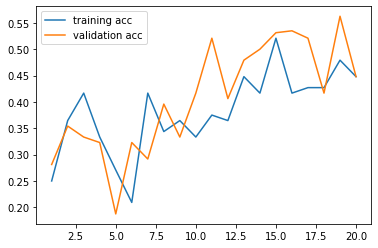

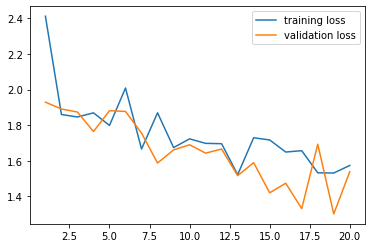

In [153]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, label='training acc')
plt.plot(epochs, val_accuracy, label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.show

In [0]:
# overfitting problem

In [0]:
# build CNN with Data Generation and Dropout

In [128]:
# Architecture
from keras.layers import Dropout

model_cnn_dropout_datagen = Sequential()

model_cnn_dropout_datagen.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn_dropout_datagen.add(Conv2D(32, (3,3), activation='relu'))
model_cnn_dropout_datagen.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout_datagen.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout_datagen.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout_datagen.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout_datagen.add(Flatten())
model_cnn_dropout_datagen.add(Dense(512, activation='relu'))
model_cnn_dropout_datagen.add(Dropout(0.5))
model_cnn_dropout_datagen.add(Dense(9, activation='softmax'))

model_cnn_dropout_datagen.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 94, 144, 64)       36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 47, 72, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 216576)           

In [0]:
model_cnn_dropout_datagen.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_dropout = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen_dropout = ImageDataGenerator(rescale=1./255)
train_datagen_dropout = ImageDataGenerator(rescale=1./255)

train_generator_dropout = train_datagen.flow_from_directory(
    '/content/boats',
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical')
validation_generator_dropout = test_datagen.flow_from_directory(
    '/content/boats',
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical')


Found 1462 images belonging to 9 classes.
Found 1462 images belonging to 9 classes.


In [133]:
historyDropDatagen = model_cnn_dropout_datagen.fit_generator(generator=train_generator_dropout,
                    validation_data=validation_generator_dropout,
                    steps_per_epoch = 1462,
                    validation_steps = 20,
                    epochs = 4)

Epoch 1/4
1462/1462 [==============================] - 931s 637ms/step - loss: 0.3431 - acc: 0.8953 - val_loss: 0.0256 - val_acc: 0.9984
Epoch 2/4
1462/1462 [==============================] - 910s 622ms/step - loss: 0.0288 - acc: 0.9955 - val_loss: 2.6231e-04 - val_acc: 1.0000
Epoch 3/4
1462/1462 [==============================] - 912s 624ms/step - loss: 0.0310 - acc: 0.9952 - val_loss: 1.7968e-04 - val_acc: 1.0000
Epoch 4/4
1462/1462 [==============================] - 908s 621ms/step - loss: 0.0209 - acc: 0.9977 - val_loss: 0.0254 - val_acc: 0.9984


<function matplotlib.pyplot.show>

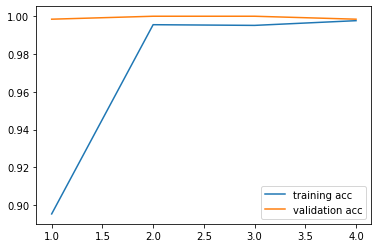

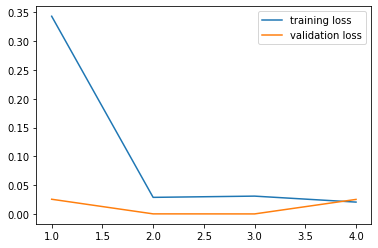

In [134]:
accuracy = historyDropDatagen.history['acc']
val_accuracy = historyDropDatagen.history['val_acc']
loss = historyDropDatagen.history['loss']
val_loss = historyDropDatagen.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, label='training acc')
plt.plot(epochs, val_accuracy, label='validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.show

In [0]:
# overfitting problem

In [0]:
# build a simplified CNN  ( Dense(512, activation='relu') ==> Dense(128, activation='relu') )

In [146]:
# Architecture
from keras.layers import Dropout

model_cnn_dropout_datagen_Simplified = Sequential()

model_cnn_dropout_datagen_Simplified.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn_dropout_datagen_Simplified.add(Conv2D(32, (3,3), activation='relu'))
model_cnn_dropout_datagen_Simplified.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout_datagen_Simplified.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout_datagen_Simplified.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout_datagen_Simplified.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout_datagen_Simplified.add(Flatten())
model_cnn_dropout_datagen_Simplified.add(Dense(128, activation='relu'))
model_cnn_dropout_datagen_Simplified.add(Dropout(0.5))
model_cnn_dropout_datagen_Simplified.add(Dense(9, activation='softmax'))

model_cnn_dropout_datagen_Simplified.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 94, 144, 64)       36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 47, 72, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 216576)          

In [0]:
del model_cnn_dropout_datagen_Simplified

In [0]:
model_cnn_dropout_datagen_Simplified.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [136]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_dropoutSimp = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen_dropoutSimp = ImageDataGenerator(rescale=1./255)
train_datagen_dropoutSimp = ImageDataGenerator(rescale=1./255)

train_generator_dropoutSimp = train_datagen_dropoutSimp.flow_from_directory(
    '/content/boats',
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical')
validation_generator_dropoutSimp = train_datagen_dropoutSimp.flow_from_directory(
    '/content/boats',
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical')


Found 1462 images belonging to 9 classes.
Found 1462 images belonging to 9 classes.


In [145]:
historyDropDatagenSimp = model_cnn_dropout_datagen_Simplified.fit_generator(generator=train_generator_dropoutSimp,
                    validation_data=validation_generator_dropoutSimp,
                    steps_per_epoch = 1000,
                    validation_steps = 20,
                    epochs = 1)

Epoch 1/1
1000/1000 [==============================] - 628s 628ms/step - loss: 0.6672 - acc: 0.7745 - val_loss: 0.0169 - val_acc: 0.9984


In [148]:
historyDropDatagenSimp = model_cnn_dropout_datagen_Simplified.fit_generator(generator=train_generator_dropoutSimp,
                    validation_data=validation_generator_dropoutSimp,
                    steps_per_epoch = 1000,
                    validation_steps = 200,
                    epochs = 1)

Epoch 1/1
1000/1000 [==============================] - 726s 726ms/step - loss: 0.6308 - acc: 0.7883 - val_loss: 0.0105 - val_acc: 0.9970


In [0]:
# overfitting problem 


In [0]:
# model chosen : "CNN with dropout", with the best accurcy 0.6 ( no overfitting problem )
# test the model

['sailboat']


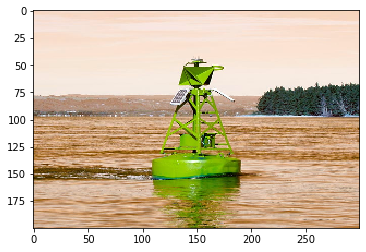

In [221]:
# test image from BUOY category
imageBUOY = read_image('/content/gdrive/My Drive/test/buoy1.jpg')
imshow(imageBUOY)
imageBUOY = imageBUOY.reshape((1,200,300,3))
predictionClass = model_cnn_dropout.predict(imageBUOY)
label_predicted = label_encoder.inverse_transform([np.argmax(predictionClass),])
print(label_predicted)
#faux

['gondola']


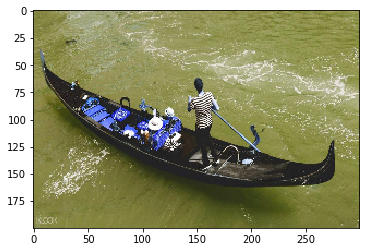

In [205]:
# test image from Gondola category
imageGondola = read_image('/content/gdrive/My Drive/test/gondola.jpg')
imshow(imageGondola)
imageGondola = imageGondola.reshape((1,200,300,3))
predictionClasss = model_cnn_dropout.predict(imageGondola)
label_predicted = label_encoder.inverse_transform([np.argmax(predictionClasss),])
print(label_predicted)

#vrai

['sailboat']


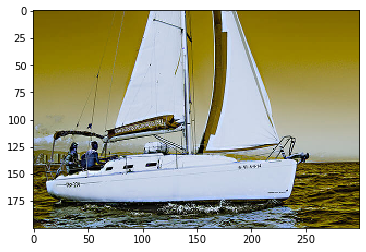

In [208]:
# test image from Sailboat category
imageSailboat = read_image('/content/gdrive/My Drive/test/sport-sailboat-escola-port-nautica.jpg')
imshow(imageSailboat)
imageSailboat = imageSailboat.reshape((1,200,300,3))
predictionClassss = model_cnn_dropout.predict(imageSailboat)
label_predicted = label_encoder.inverse_transform([np.argmax(predictionClassss),])
print(label_predicted)

# vrai